# Release highlights for OpenTURNS 1.16

In [1]:
from __future__ import print_function
import openturns as ot
import math as m

### FejerAlgorithm

The first new class is the [FejerAlgorithm](https://openturns.github.io/openturns/latest/user_manual/_generated/openturns.FejerAlgorithm.html) integration method.

It provides 3 variants: type 1 & 2 and Clenshaw-Curtis

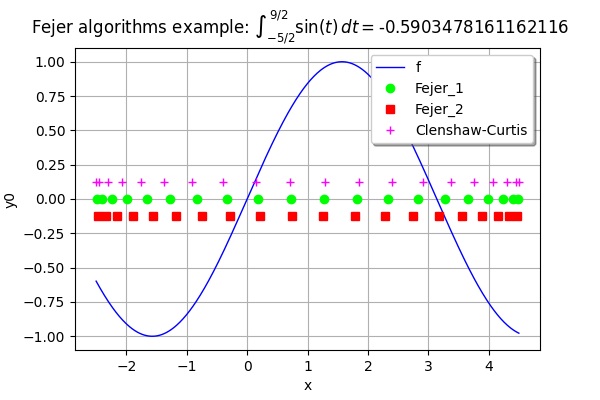

In [2]:
f = ot.SymbolicFunction(['x'], ['sin(x)'])
a = -2.5
b = 4.5
g = f.draw(a, b, 512)

# Fejer type 1
algo = ot.FejerAlgorithm([20], ot.FejerAlgorithm.FEJERTYPE1)
value, nodes = algo.integrateWithNodes(f, ot.Interval(a, b))
lower = ot.Cloud(nodes, ot.Sample(nodes.getSize(), 1))
lower.setColor("green")
lower.setPointStyle('circle')
g.add(lower)

# Fejer type 2
algo = ot.FejerAlgorithm([20], ot.FejerAlgorithm.FEJERTYPE2)
value, nodes = algo.integrateWithNodes(f, ot.Interval(a, b))
lower = ot.Cloud(nodes, ot.Sample(nodes.getSize(), [-1.0/8]))
lower.setColor("red")
lower.setPointStyle('square')
g.add(lower)

# Clenshaw-Curtis
algo = ot.FejerAlgorithm([20], ot.FejerAlgorithm.CLENSHAWCURTIS)
value, nodes = algo.integrateWithNodes(f, ot.Interval(a, b))
lower = ot.Cloud(nodes, ot.Sample(nodes.getSize(), [1.0/8]))
lower.setColor("magenta")
lower.setPointStyle('plus')
g.add(lower)

g.setTitle(
    r"Fejer algorithms example: $\int_{-5/2}^{9/2}\sin(t)\,dt=$" + str(value[0]))

g.setLegends(["f", "Fejer_1", "Fejer_2", "Clenshaw-Curtis"])
g.setLegendPosition("topright")
g

### Block independent distribution

The new [BlockIndependentDistribution](https://openturns.github.io/openturns/latest/user_manual/_generated/openturns.BlockIndependentDistribution.html) class allows to merge a collection of independent distributions.

Until now we had the ComposedDistribution which allowed to merge only marginal distributions.

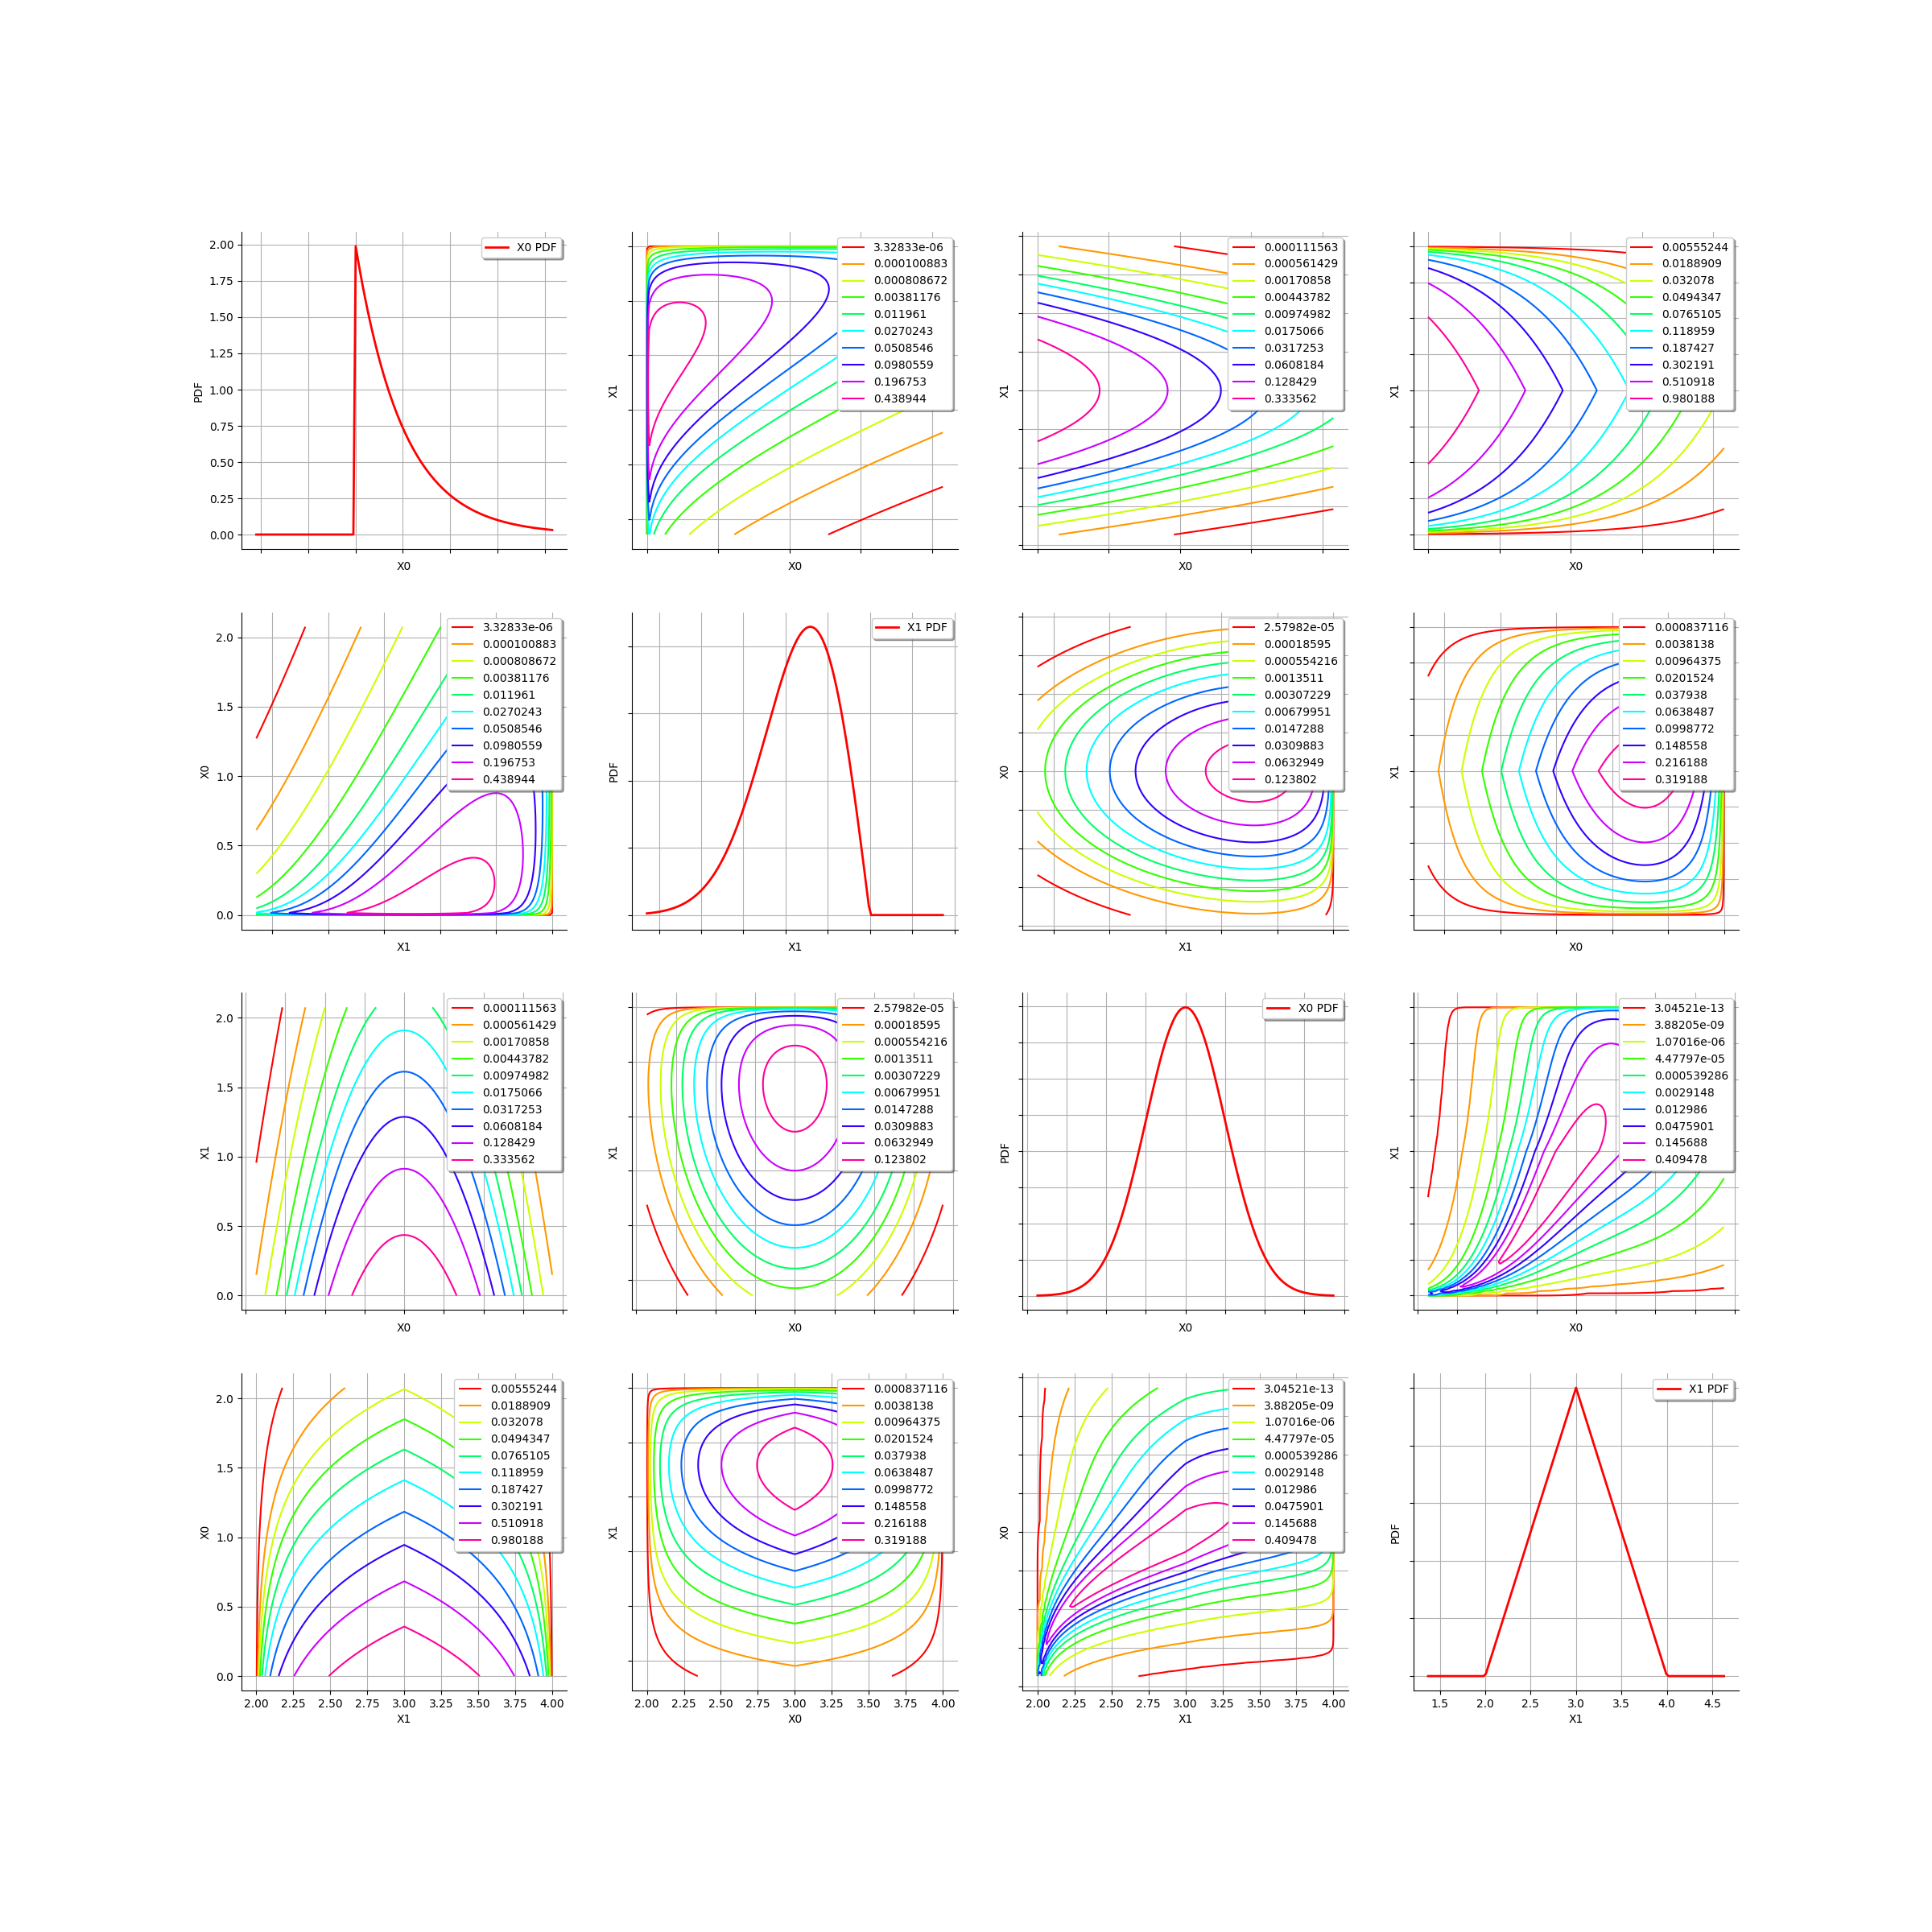

In [3]:
R = ot.CorrelationMatrix(2)
R[0, 1] = 0.5
atom1 = ot.ComposedDistribution([ot.Exponential(2.0), ot.WeibullMax(2.0, 2.0)], ot.NormalCopula(R))
atom2 = ot.ComposedDistribution([ot.Normal(2.0, 1.0), ot.Triangular(2.0, 3.0, 4.0)], ot.ClaytonCopula(3.0))
distribution = ot.BlockIndependentDistribution([atom1, atom2])
d = distribution.getDimension()
graph = ot.GridLayout(d,d)
for i in range(d):
    for j in range(d):
        if i == j:
            try:
                graph.setGraph(i, i, distribution.getMarginal(i).drawPDF())
            except:
                # fixed after rc1
                pass
        else:
            graph.setGraph(i, j, distribution.getMarginal([i,j]).drawPDF())
graph

### Grid graphs

As we just saw there a new graphing class [GridLayout](https://openturns.github.io/openturns/latest/user_manual/response_surface/_generated/openturns.GridLayout.html) allows to organize subgraphs in a grid.

It is used in various places of the library (ProcessSample, VisualTest, CalibrationResult, MetaModelValidation).

It provides new capabilities where multivariate objects are treated.

Q2= [0.999997,0.702235]


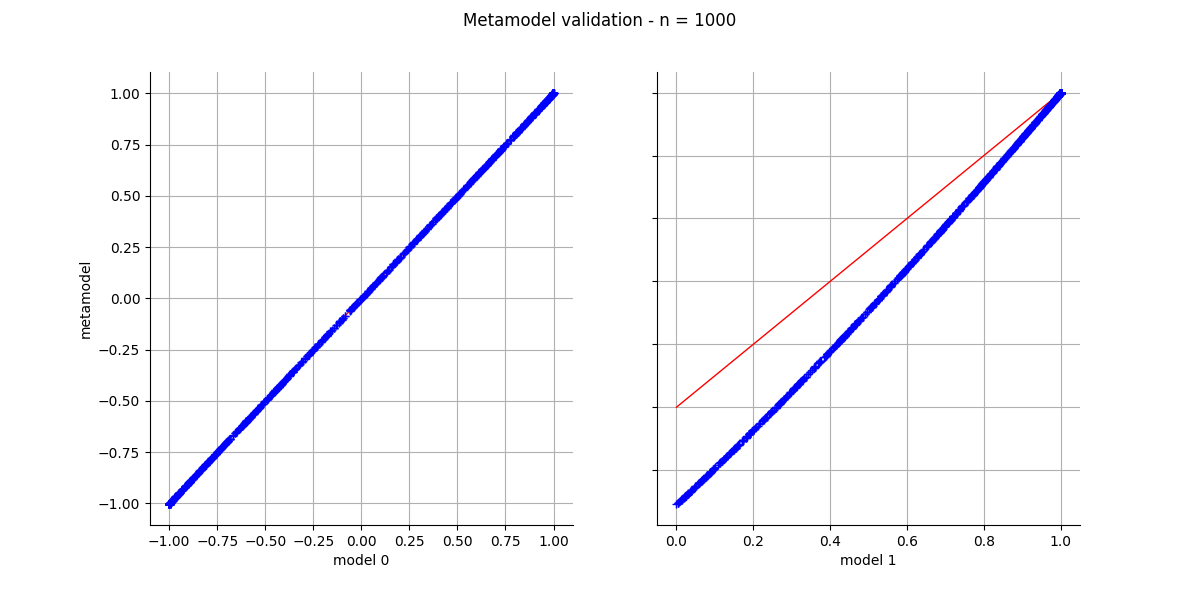

In [4]:
dist = ot.Uniform(-m.pi/2, m.pi/2)
model = ot.SymbolicFunction(['x'], ['sin(x)', 'cos(x)'])
metaModel = ot.SymbolicFunction(['x'], ['x - x^3/6.0 + x^5/120.0', 'cos(1.2*x)'])
x = dist.getSample(1000)
y = model(x)
val = ot.MetaModelValidation(x, y, metaModel)
q2 = val.computePredictivityFactor()
residual = val.getResidualSample()
print("Q2=", q2)
graph = val.drawValidation()
graph


### Minimum volume classifier

The [MinimumVolumeClassifier](https://openturns.github.io/openturns/latest/user_manual/response_surface/_generated/openturns.MinimumVolumeClassifier.html) implements a mixture classifier based on a minimum volume confidence domain.

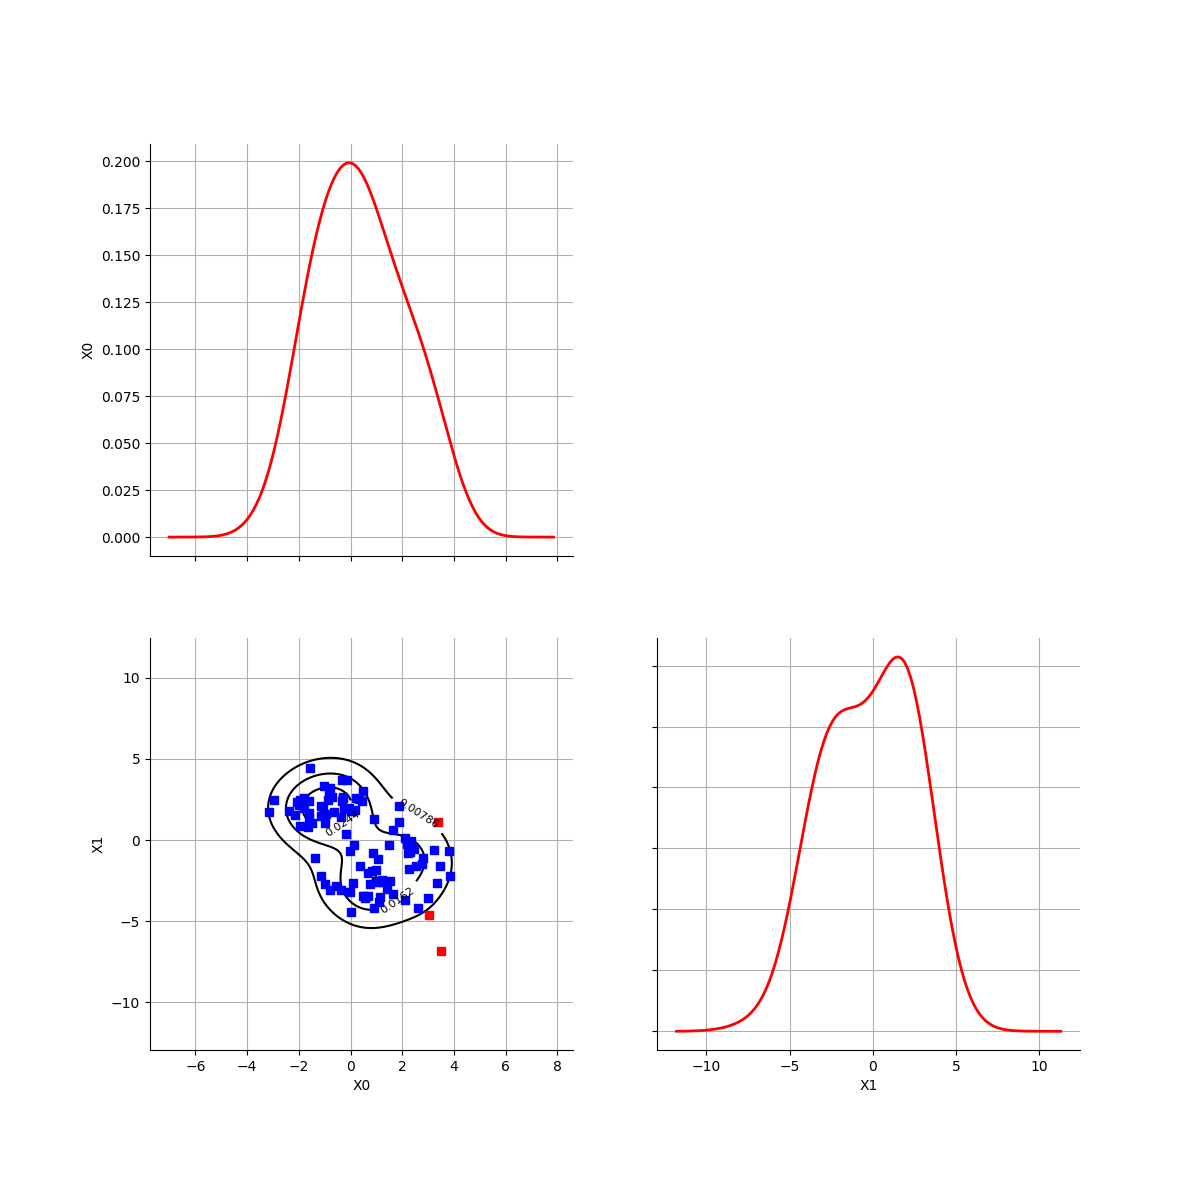

In [5]:
# 3-d test
R1 = ot.CovarianceMatrix(3)
R1[2, 1] = -0.25
R2 = ot.CovarianceMatrix(3)
R2[1, 0] = 0.5
R2[2, 1] = -0.3
R2[0, 0] = 1.3
dists = [ot.Normal([1.0, -2.0, 3.0], R1), ot.Normal([-1.0, 2.0, -2.0], R2)]
mixture = ot.Mixture(dists, [2.0 / 3.0, 1.0 / 3.0])

# 2-d test
dists = [ot.Normal([-1.0, 2.0], [1.0]*2, ot.CorrelationMatrix(2)),
         ot.Normal([1.0, -2.0], [1.5]*2, ot.CorrelationMatrix(2))]
mixture = ot.Mixture(dists)

sample = mixture.getSample(100)
distribution = ot.KernelSmoothing().build(sample)
algo = ot.MinimumVolumeClassifier(distribution, 0.8)
graph = algo.drawContourAndSample([0.1, 0.5, 0.8], sample, [0, 1])
graph

### Functional covariance model

The [StationaryFunctionalCovarianceModel](https://openturns.github.io/openturns/latest/user_manual/_generated/openturns.StationaryFunctionalCovarianceModel.html) allows to define an 1-d covariance model from a custom correlation function.

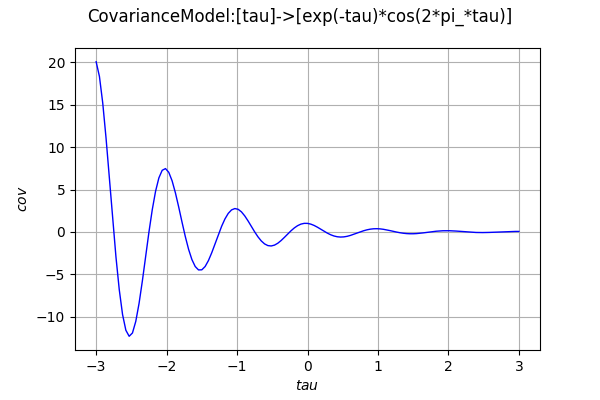

In [14]:
rho = ot.SymbolicFunction(['tau'], ['exp(-tau)*cos(2*pi_*tau)'])
covarianceModel = ot.StationaryFunctionalCovarianceModel([1.0], [1.0], rho)
covarianceModel.isStationary()
scale = covarianceModel.getScale()[0]
def f(x):
    return [covarianceModel(x)[0, 0]]
func = ot.PythonFunction(1, 1, f)
func.setDescription(['$tau$', '$cov$'])
cov_graph = func.draw(-3.0 * scale, 3.0 * scale, 129)
cov_graph.setTitle('CovarianceModel:'+str(rho))
cov_graph

### XML/H5 storage backend

The [XMLH5StorageManager](https://openturns.github.io/openturns/latest/user_manual/_generated/openturns.XMLH5StorageManager.html) now allows to store study data in hybrid XML/H5 format,
instead of the legacy XML format.

### New AIC/AICC fitting tests

In [18]:
distribution = ot.Normal()
sample = distribution.getSample(30)
print("AIC=", ot.FittingTest.AIC(sample, distribution))
print("AICC=", ot.FittingTest.AICC(sample, distribution))


AIC= 2.3450432896002478
AICC= 2.3450432896002478


### New examples gallery

Visit the new [examples gallery](https://openturns.github.io/openturns/latest/examples/examples.html)